In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
iris_data = pd.read_csv('../files/Week02_iris_w_missing.csv')

In [3]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,NaN,3.4,5.4,2.3,virginica


In [5]:
dropped_iris_data = iris_data.dropna(axis = 0)
X = dropped_iris_data.drop(columns = 'target')
y = dropped_iris_data['target']

In [6]:
target_dict = {}

for i, v in enumerate(dropped_iris_data.target.unique()):
    target_dict[i] = v
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [7]:
label_encoded_species = pd.Series([None for i in range(dropped_iris_data.shape[0])])

for i in range(len(target_dict)):
    label_encoded_species[iris_data['target'] == target_dict[i]] = i


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoded_series_sklearn = LabelEncoder().fit_transform(dropped_iris_data[['target']])
label_encoded_series_sklearn

C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
dropped_iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [10]:
from sklearn.naive_bayes import GaussianNB as GNB

results = []

model = GNB()
model.fit(X, label_encoded_series_sklearn)
result_basic = model.predict(X)

results.append(result_basic);
pd.DataFrame(result_basic).value_counts()

0    42
2    41
1    39
dtype: int64

In [11]:
model_0 = GNB(priors = [.98, .01, .01])
model_0.fit(X, label_encoded_series_sklearn)
result_0 = model_0.predict(X)

results.append(result_0)
pd.DataFrame(result_0).value_counts()

0    42
2    41
1    39
dtype: int64

In [12]:
model_1 = GNB(priors = [.01, .98, .01])
model_1.fit(X, label_encoded_series_sklearn)
result_1 = model_1.predict(X)

results.append(result_1)
pd.DataFrame(result_1).value_counts()

1    48
0    42
2    32
dtype: int64

In [13]:
model_2 = GNB(priors = [.01, .01, .98])
model_2.fit(X, label_encoded_series_sklearn)
result_2 = model_2.predict(X)

results.append(result_2)
pd.DataFrame(result_2).value_counts()

2    54
0    42
1    26
dtype: int64

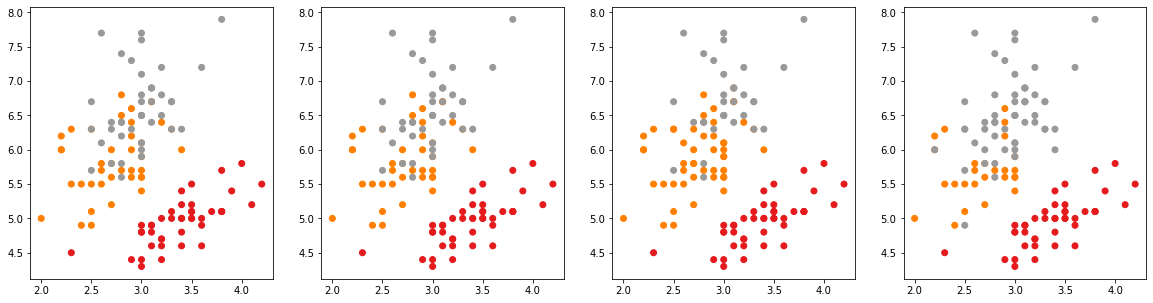

In [22]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i in range(4):
    axes[i].scatter(dropped_iris_data.sepal_width, dropped_iris_data.sepal_length, c = results[i], marker = 'o', cmap = 'Set1')

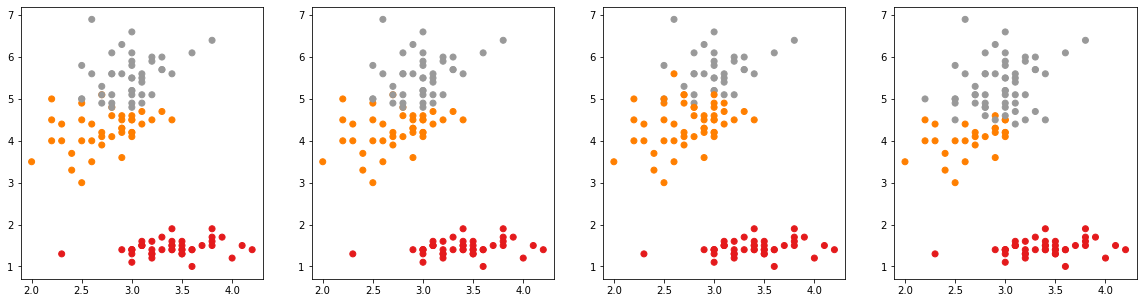

In [23]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i in range(4):
    axes[i].scatter(dropped_iris_data.sepal_width, dropped_iris_data.petal_length, c = results[i], marker = 'o', cmap = 'Set1')

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(result_basic, result_0))
print("Accuracy : ", accuracy_score(result_basic, result_1))
print("Accuracy : ", accuracy_score(result_basic, result_2))

Accuracy :  1.0
Accuracy :  0.9262295081967213
Accuracy :  0.8934426229508197
